# 互评作业1: 数据探索性分析与预处理

## 对性别的分析

In [1]:
%%time
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import os
from collections import defaultdict
from pathlib import Path

data_type = "10G"
data_dir = Path(f"./data/{data_type}_data/")
file_paths = [file for file in data_dir.glob("*.parquet")]

gender_counts = defaultdict(int)

for file_path in file_paths:
    # 分块读取文件
    parquet_file = pq.ParquetFile(file_path)
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        
        chunk_counts = df['gender'].value_counts(dropna=False)
        for gender, count in chunk_counts.items():
            gender_counts[gender] += count

result_df = pd.DataFrame(list(gender_counts.items()), columns=['gender', 'count'])
result_df = result_df.sort_values(by='count', ascending=False)
result_df = result_df.reset_index(drop=True)

result_df

CPU times: total: 4min 41s
Wall time: 3min 46s


,gender,count
0,男,21603397
1,女,21598086
2,未指定,899652
3,其他,898865


绘制饼状图

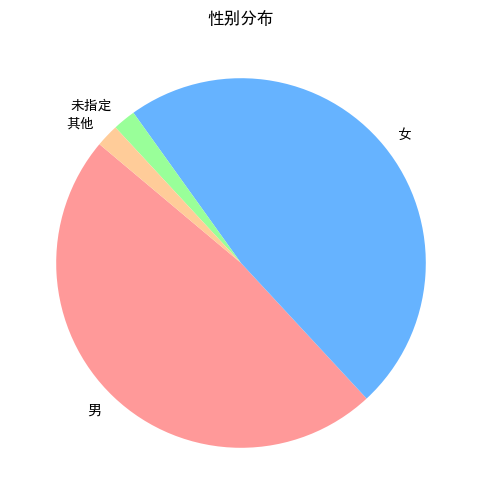

CPU times: total: 719 ms
Wall time: 894 ms


In [2]:
%%time
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

labels = result_df['gender']
sizes = result_df['count'].values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('性别分布')

plt.show()

In [3]:
%%time
total_count = result_df['count'].sum()
error_value = result_df[result_df['gender'].isin(['未指定', '其他'])]['count'].sum()
print(f"总记录数: {total_count}")
print(f"性别异常值: {error_value}")
print(f"异常值占比: {(error_value/total_count*100):.2f}%")

总记录数: 45000000
性别异常值: 1798517
异常值占比: 4.00%
CPU times: total: 0 ns
Wall time: 3.01 ms


认为性别为“男”和“女”，为正常值，“未指定”和“其他”均为异常值

## 对国家的分析

In [4]:
%%time
country_counts = defaultdict(int)

for file_path in file_paths:
    parquet_file = pq.ParquetFile(file_path)
    
    # 分块读取文件
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        
        chunk_counts = df['country'].value_counts(dropna=False)
        for country, count in chunk_counts.items():
            country_counts[country] += count

result_df = pd.DataFrame(list(country_counts.items()), columns=['country', 'count'])
result_df = result_df.sort_values(by='count', ascending=False)
result_df = result_df.reset_index(drop=True)

result_df

CPU times: total: 4min 48s
Wall time: 3min 48s


,country,count
0,英国,4501669
1,法国,4501427
2,美国,4501158
3,巴西,4500526
4,德国,4500370
5,印度,4499562
6,俄罗斯,4499132
7,澳大利亚,4499124
8,日本,4498695
9,中国,4498337


绘制柱状图

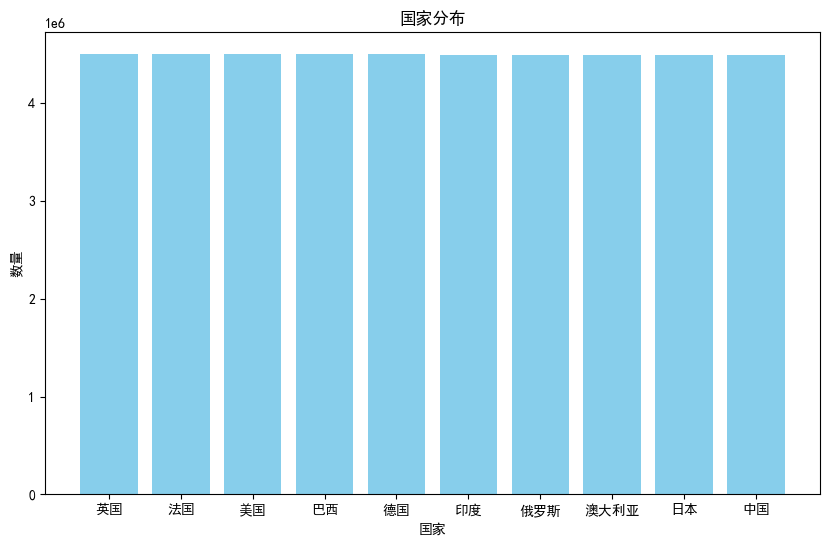

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.bar(result_df['country'], result_df['count'], color='skyblue')
plt.xlabel('国家')
plt.ylabel('数量')
plt.title('国家分布')
plt.show()

## 对年龄的分析

In [6]:
%%time
age_counts = defaultdict(int)

for file_path in file_paths:
    # 分块读取文件
    parquet_file = pq.ParquetFile(file_path)
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        chunk_counts = df['age'].value_counts(dropna=False)
        for age, count in chunk_counts.items():
            age_counts[age] += count

result_df = pd.DataFrame(list(age_counts.items()), columns=['age', 'count'])
result_df = result_df.sort_values(by='age', ascending=True)
result_df = result_df.reset_index(drop=True)

result_df

CPU times: total: 4min 46s
Wall time: 3min 44s


,age,count
0,18,542324
1,19,541384
2,20,542862
3,21,542716
4,22,542482
...,...,...
78,96,542174
79,97,542426
80,98,541367
81,99,542534


绘制折线图

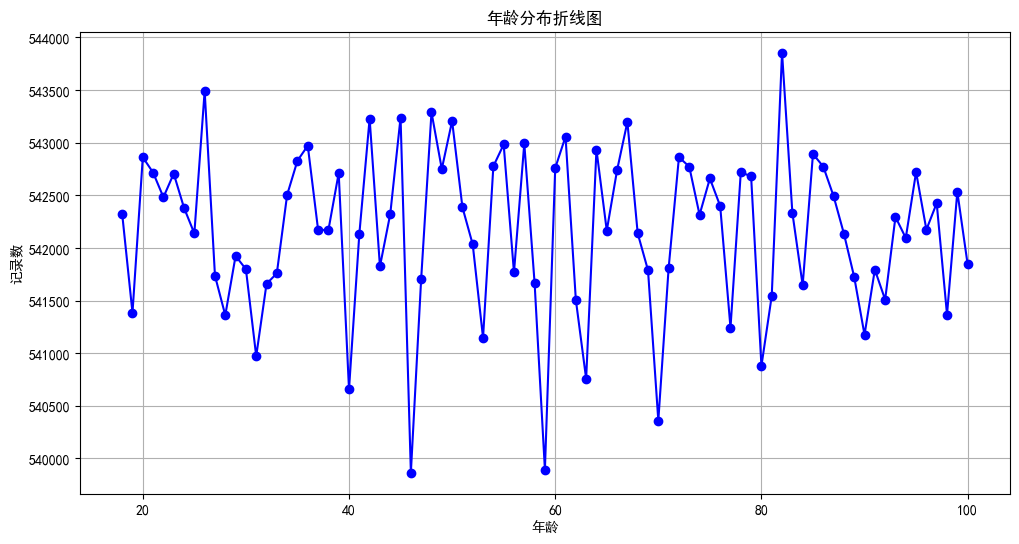

CPU times: total: 203 ms
Wall time: 198 ms


In [7]:
%%time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(result_df['age'], result_df['count'], marker='o', linestyle='-', color='b')
plt.xlabel('年龄')
plt.ylabel('记录数')
plt.title('年龄分布折线图')
plt.grid(True)

plt.show()

## 对收入的分析

In [8]:
%%time
income_counts = defaultdict(int)

for file_path in file_paths:
    # 分块读取文件
    parquet_file = pq.ParquetFile(file_path)
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        chunk_counts = df['income'].value_counts(dropna=False)
        for income, count in chunk_counts.items():
            income_counts[income] += count

result_df = pd.DataFrame(list(income_counts.items()), columns=['income', 'count'])
result_df = result_df.sort_values(by='income', ascending=True)
result_df = result_df.reset_index(drop=True)

result_df

CPU times: total: 6min 15s
Wall time: 5min 17s


,income,count
0,0.01,1
1,0.02,2
2,0.06,1
3,0.10,2
4,0.13,1
...,...,...
36236407,999999.88,1
36236408,999999.89,3
36236409,999999.96,2
36236410,999999.98,1


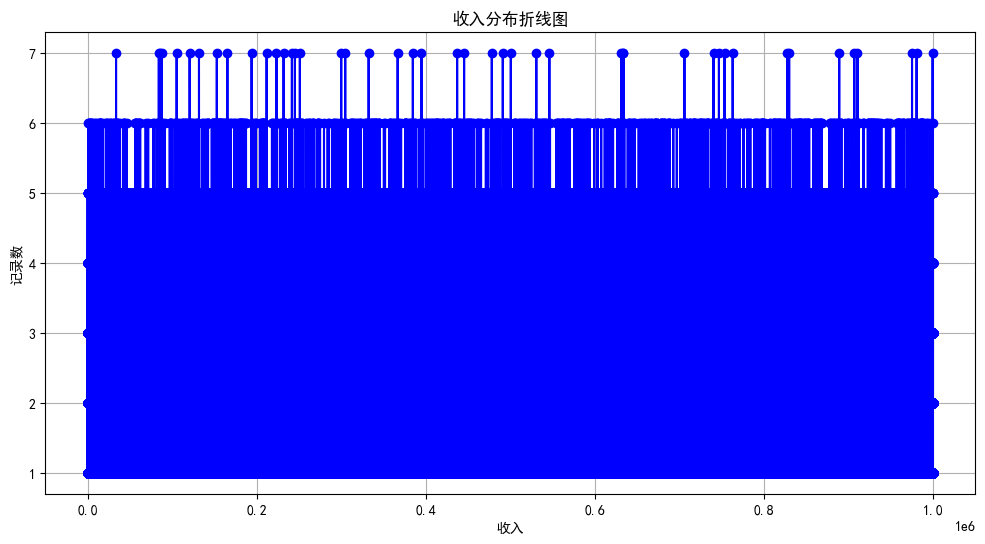

CPU times: total: 1min 30s
Wall time: 1min 31s


In [9]:
%%time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(result_df['income'], result_df['count'], marker='o', linestyle='-', color='b')
plt.xlabel('收入')
plt.ylabel('记录数')
plt.title('收入分布折线图')
plt.grid(True)

plt.show()

## 识别潜在高价值用户

In [10]:
%%time
import glob
# 筛选年龄在20——35岁之间，收入50000以上的用户作为潜在高价值用户
# 新开一列表示该用户是否为高价值用户，1表示该用户是高价值用户，0则不是
high_counts = defaultdict(int)
for index, file_path in enumerate(file_paths):
    parquet_file = pq.ParquetFile(file_path)
    print(parquet_file)
    
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        conditions = (
            (df['age'].between(20, 35)) &
            (df['income'] > 50000)
        )
        df['is_high_value_user'] = conditions.astype(int)
        temp_file_path = f"part-{index}-temp_chunk_{i}.parquet"
        df.to_parquet(temp_file_path)
        chunk_counts = df['is_high_value_user'].value_counts(dropna=False)
        for high, count in chunk_counts.items():
            high_counts[high] += count
    
    temp_files = glob.glob(f"part-{index}-temp_chunk_*.parquet")
    merged_df = pd.concat([pd.read_parquet(file) for file in temp_files], ignore_index=True)
    save_path = f"result/{data_type}_data/part-0000{index}.parquet"
    merged_df.to_parquet(save_path)
    merged_df.head()
    # 删除临时文件
    for file in temp_files:
        os.remove(file)

result_df = pd.DataFrame(list(high_counts.items()), columns=['high_counts', 'count'])
# result_df = result_df.sort_values(by='count', ascending=False)
# result_df = result_df.reset_index(drop=True)

result_df

total_count = result_df['count'].sum()
high_count = result_df[result_df['high_counts'].isin([1])]['count'].sum()
print(f"总记录数: {total_count}")
print(f"高价值用户数: {high_count}")
print(f"占比: {(high_count/total_count*100):.2f}%")

总记录数: 45000000
高价值用户数: 8240509
占比: 18.31%
CPU times: total: 24min 46s
Wall time: 25min 27s
